570 Assignment 2

Name: Yuqing Lu 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import graphviz as gr

$Y_i = a+b*T+e_i$  
$e_i \sim N(0,\sigma^2)$

Choose the first three sections

# 1. Covariate

illustrate DGP with DAG

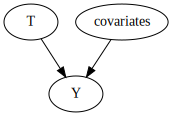

In [2]:
g = gr.Digraph()
g.edge("T", "Y")
g.edge("covariates", "Y")
g

# a. No covariate

sample size = 100

In [3]:
a = .5
b = 1.2
n = 100
cval = 1.96
# sample size
slope_estimates = []
res_bse = []
RMSE = []
for mc_replication in range(1000):
    # stimulate a DGP
    T = np.random.binomial(1, 0.5, n) #treatment
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+e
    mod = sm.OLS(Y,sm.add_constant(T))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]

In [4]:
# store simulated data
data1 = pd.DataFrame(dict(Treatment = T,Error = e, Y = Y))
data1.to_csv("data1.csv")

In [5]:
# mod = sm.OLS(Y,sm.add_constant(T)) #decribe the model
# res = mod.fit() #fit model
# print(res.summary()) #summarize the model
# slope_estimates

In [6]:
m = slope_estimates
for i in range(len(m)):
    m[i] = m[i] - b
# print(m)

Bias, RMSE & Size of treatment effect estimate

In [7]:
#Bias
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
#RMSE
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
#Size
# tval = m / res.bse[1]
tval = np.array(m) / res_bse
# print(tval)
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -1.2005490711922617
RMSE = 0.0958160184935249
size = 0.069


In [8]:
# res.mse_resid #obtain mean square error of residual

sample size = 1000

In [9]:
a = .5
b = 1.2
n = 1000
cval = 1.96
slope_estimates = []
res_bse = []
RMSE = []
for mc_replication in range(1000):
    T = np.random.binomial(1, 0.5, n)
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+e
    mod = sm.OLS(Y,sm.add_constant(T))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]

In [10]:
m = slope_estimates
for i in range(len(m)):
    m[i] = m[i] - b

Bias, RMSE & Size

In [11]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -1.1999426501030432
RMSE = 0.1046150166528456
size = 0.048


# b. control all covariates

sample size = 100

In [12]:
from tqdm import tqdm
a = .5
b = 1.2
n = 100
c = 1.0 # the slope of covariate
cval = 1.96
slope_estimates = []
res_bse = []
RMSE = []
for mc_replication in tqdm(range(1000)):
    T = np.random.binomial(1, 0.5, n) #treatment
    C = np.random.normal(0,0.08,n) #convariate
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+c*C+e
    mod = sm.OLS(Y,sm.add_constant(pd.concat([pd.Series(T),pd.Series(C)], axis=1)))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates = slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]
    m = np.array(res.params[1]) - b

100%|██████████| 1000/1000 [00:02<00:00, 349.41it/s]


In [13]:
# store simulated data
data2 = pd.DataFrame(dict(Treatment = T, Covariate = C, Error = e, Y = Y))
data2.to_csv("data2.csv")

In [14]:
# m = slope_estimates
# for i in range(len(m)):
#     m[i] = m[i] - b

In [15]:
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(np.mean(RMSE))
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -0.19979537777211687
RMSE = 0.0997486848951149
size = 1.0


sample size = 1000

In [16]:
a = .5
b = 1.2
n = 1000
c = 1.0 # the slope of covariate
cval = 1.96
slope_estimates = []
res_bse = []
RMSE = []
for mc_replication in range(1000):
    T = np.random.binomial(1, 0.5, n) #treatment
    C = np.random.normal(0,0.08,n) #convariate
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+c*C+e
    mod = sm.OLS(Y,sm.add_constant(pd.concat([pd.Series(T),pd.Series(C)], axis=1)))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates = slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]

In [17]:
m = slope_estimates
for i in range(len(m)):
    m[i] = m[i] - b

In [18]:
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(np.mean(RMSE))
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -1.4014489063120883
RMSE = 0.09993802244085474
size = 0.997


Example: Researchers run an experiment to see how corn plants tolerate drought. But the level of drought is not the only factor that affects the performance of plants. Size is a known factor that affects tolerance levels. Therefore, size is one of covariates.

# 2. Confounder

illustrate DGP with DAG

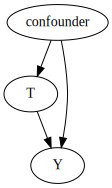

In [19]:
g = gr.Digraph()
g.edge("confounder","T")
g.edge("confounder", "Y")
g.edge("T", "Y")
g

## a.  fail to control confounder

sample size = 100

In [20]:
a = .5
b = 1.2
n = 100
cval = 1.96
# sample size
slope_estimates = []
res_bse = []
RMSE = []
for mc_replication in range(1000):
    T = np.random.binomial(1, 0.5, n) #treatment
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+e
    mod = sm.OLS(Y,sm.add_constant(T))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]

In [21]:
m = slope_estimates
for i in range(len(m)):
    m[i] = m[i] - b

In [22]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -1.2013966231230386
RMSE = 0.08850945464607522
size = 0.058


sample size = 1000

In [23]:
a = .5
b = 1.2
n = 1000
cval = 1.96
# sample size
slope_estimates = []
res_bse = []
RMSE = []
for mc_replication in range(1000):
    T = np.random.binomial(1, 0.5, n) #treatment
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+e
    mod = sm.OLS(Y,sm.add_constant(T))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]

In [24]:
m = slope_estimates
for i in range(len(m)):
    m[i] = m[i] - b

In [25]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -1.1997737778493103
RMSE = 0.09987289686117634
size = 0.046


# b. control confounder

sample size = 100

In [26]:
a = .5
b = 1.2
n = 100
cval = 1.96
v = 1.0 #slope of confounder
slope_estimates = []
res_bse = []
RMSE = []
for mc_replication in range(1000):
    C = np.random.normal(0,0.08,n) # gernerate confounder
    T = np.random.binomial(1,0.5,n) #treatment
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+v*C+e
    mod = sm.OLS(Y,sm.add_constant(pd.concat([pd.Series(T),pd.Series(C)], axis=1)))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]
    m = np.array(res.params[1]) - b

In [27]:
# store simulated data
data3 = pd.DataFrame(dict(Treatment = T,Error = e,Confounder = C, Y = Y))
data3.to_csv("data3.csv")

In [28]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -0.20088849293656397
RMSE = 0.09429434503194664
size = 0.0


sample size = 1000

In [29]:
a = .5
b = 1.2
n = 1000
cval = 1.96
v = 1.0 #slope of confounder
slope_estimates = []
RMSE = []
res_bse = []
for mc_replication in range(1000):
    C = np.random.normal(0,0.08,n) # gernerate confounder
    T = np.random.binomial(1,0.5,n) #treatment
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+v*C+e
    mod = sm.OLS(Y,sm.add_constant(pd.concat([pd.Series(T),pd.Series(C)], axis=1)))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]
    m = np.array(res.params[1]) - b

In [30]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -0.19920154821428637
RMSE = 0.09866828705466997
size = 1.0


Example:
Researchers try to assess the effectiveness of drug X. Here the chances of recovery is dependent variable Y. But data show that gender would influence both patients' choice of drug X and the chances of recovery Y. Therefore, gender is a confounder, confounding the relation between X and Y.

# 3. Selection Bias

illustrate DGP with DAG

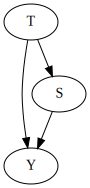

In [31]:
g = gr.Digraph()
g.edge("T", "Y")
g.edge("S", "Y")
g.edge("T", "S")
g

S represents selection bias. It is in between the path from the treatment to the outcome

# a. control the variable between the path from cause to effect

sample size = 100

In [32]:
a = .5
b = 1.2
n = 100
cval = 1.96
v = 1.0
# sample size
slope_estimates = []
RMSE = []
res_bse = []
for mc_replication in range(1000):
    T = np.random.binomial(1,0.5,n) #treatment
    S = np.random.normal(1+0.2*T,1) #selection bias
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+v*S+e
    mod = sm.OLS(Y,sm.add_constant(pd.concat([pd.Series(T),pd.Series(S)], axis=1)))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]
    m = np.array(res.params[1]) - b

In [33]:
# store simulated data
data4 = pd.DataFrame(dict(Treatment = T, Selectionbias = S, Error = e, Y = Y))
data4.to_csv("data4.csv")

In [34]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -0.20035878189559064
RMSE = 0.0948672403192556
size = 1.0


sample size = 1000

In [35]:
a = .5
b = 1.2
n = 1000
cval = 1.96
v = 1.0
# sample size
slope_estimates = []
RMSE = []
res_bse = []
for mc_replication in range(1000):
    T = np.random.binomial(1,0.5,n) #treatment
    S = np.random.normal(1+0.2*T,1) #selection bias
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+v*S+e
    mod = sm.OLS(Y,sm.add_constant(pd.concat([pd.Series(T),pd.Series(S)], axis=1)))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]
    m = np.array(res.params[1]) - b

In [36]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -0.19992919509294427
RMSE = 0.09893872854929102
size = 1.0


# b. do not control for the variable in between the path from cause to effect

sample size = 100

In [37]:
a = .5
b = 1.2
n = 100
cval = 1.96
# sample size
slope_estimates = []
RMSE = []
res_bse = []
for mc_replication in range(1000):
    T = np.random.binomial(1,0.5,n) #treatment
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+e
    mod = sm.OLS(Y,sm.add_constant(T))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]
    m = np.array(res.params[1]) - b

In [38]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = 0.0002416419365123268
RMSE = 0.09571695638357411
size = 0.0


sample size = 1000

In [39]:
a = .5
b = 1.2
n = 1000
cval = 1.96
# sample size
slope_estimates = []
RMSE = []
res_bse = []
for mc_replication in range(1000):
    T = np.random.binomial(1,0.5,n) #treatment
    e = np.random.normal(0,0.1,n)
    Y = a+b*T+e
    mod = sm.OLS(Y,sm.add_constant(T))
    res = mod.fit()
    res_bse.append(res.bse[1])
    slope_estimates =slope_estimates + [res.params[1]]
    RMSE = RMSE + [res.mse_resid]
    m = np.array(res.params[1]) - b

In [40]:
np.mean(slope_estimates)
bias = np.mean(slope_estimates)- b
print("bias = " + str(bias))
RMSE = math.sqrt(res.mse_resid)
print("RMSE = " + str(RMSE))
tval = np.array(m) / res_bse
size = np.mean(1*(np.abs(tval)>cval))
print("size = " + str(size))

bias = -6.255636515262175e-05
RMSE = 0.10097917530406587
size = 0.0


Example: Researchers figure out the impact of sending an email asking people to negotiate their debt. Receiving an email is the treatment. credit limit and risk score are other factors. Whether open the email is the selection bias.